# An investigation into the numpy.random package


[NUMPY OFFICAL DOCUMENTATION](https://numpy.org/doc/stable/reference/random/generator.html)

In [1]:
import numpy as np

In [2]:
rng = np.random.default_rng()

In [3]:
rng.integers(2, size=10)

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [4]:
rng.integers(1, size=10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
x = rng.integers(100, size = 10)

In [28]:
import matplotlib.pyplot as plt

(array([1., 1., 1., 0., 0., 0., 1., 2., 2., 2.]),
 array([13. , 21.4, 29.8, 38.2, 46.6, 55. , 63.4, 71.8, 80.2, 88.6, 97. ]),
 <BarContainer object of 10 artists>)

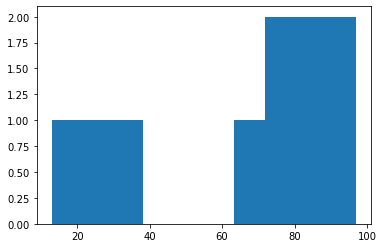

In [29]:
plt.hist(x)

In [45]:
np.random.uniform(0,1000,1000)

array([2.58569675e+02, 4.15419441e+02, 6.70853776e+02, 2.71874984e+02,
       7.81460762e+01, 9.07509238e+02, 6.41963184e+02, 7.87754533e+01,
       3.20527212e+02, 2.20627884e+02, 9.19389179e+02, 5.78182310e+02,
       9.53084700e+02, 9.38625668e+02, 9.84367439e+02, 6.57089364e+02,
       3.06228796e+02, 8.56209486e+02, 7.58367748e+02, 8.66297097e+02,
       5.11880074e+02, 2.26502918e+02, 3.87670945e+02, 4.68421931e+02,
       8.45913199e+02, 8.80493104e+02, 1.30741106e+02, 8.92763846e+02,
       9.67568062e+02, 8.63418678e+02, 5.03413170e+02, 3.10927472e+02,
       3.92003434e+02, 2.75361789e+02, 3.55333691e+02, 6.81154323e+01,
       5.56865196e+02, 1.71706746e+02, 1.08916928e+02, 6.52132321e+02,
       5.96025659e+02, 7.96492359e+02, 2.15259341e+02, 4.50992428e+01,
       9.42179938e+02, 3.09400999e+02, 8.28690512e+02, 4.60503435e+02,
       7.43174723e+02, 1.62336763e+02, 7.92342039e+02, 8.29639481e+02,
       8.06139656e+01, 3.37812299e+00, 4.86203469e+02, 2.37449803e+01,
      

In [48]:
x = np.random.uniform(0,1000,10000)

(array([ 967., 1034., 1016., 1016., 1038., 1002., 1027.,  969.,  935.,
         996.]),
 array([1.55049522e-01, 1.00126763e+02, 2.00098476e+02, 3.00070190e+02,
        4.00041903e+02, 5.00013617e+02, 5.99985330e+02, 6.99957043e+02,
        7.99928757e+02, 8.99900470e+02, 9.99872184e+02]),
 <BarContainer object of 10 artists>)

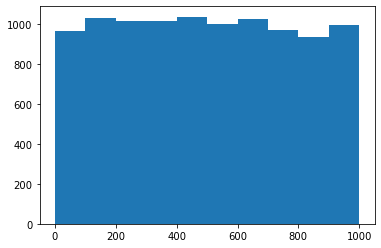

In [49]:
plt.hist(x)

In [56]:
x = np.random.normal(10, 100, 1000)

(array([ 10.,  36.,  80., 168., 219., 209., 161.,  84.,  23.,  10.]),
 array([-283.43241957, -225.73686163, -168.0413037 , -110.34574577,
         -52.65018783,    5.0453701 ,   62.74092804,  120.43648597,
         178.1320439 ,  235.82760184,  293.52315977]),
 <BarContainer object of 10 artists>)

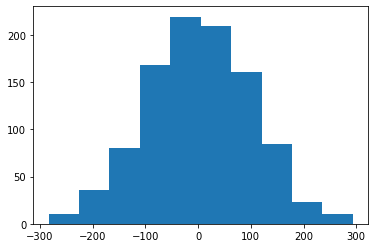

In [57]:
plt.hist(x)